# "The Motion of a Double Pendulum"

The goal of this project is to make a projection on the motion of a double pendulum as it moves through time, while also defining and solving for the differential equations that govern its motion. 

This project is going to be math intensive, so it is best to begin with defining what equations are going to be used later on. 

A proper definition of a double pendulum is needed. A double pendulum consists of a normal pendulum hanging from a bob connected to another pendulum hanging, which itself is connected to a bob.

For simplicity:
- Friciton is going to be ignored
- The bobs that are at the end of the each pendulum are equal in mass
- Pendulums have no mass
- Pendulums have same length

The position of the arms are given as $\theta_1$ and $\theta_2$. From the Lagrangian Formalism, we can derive equations of motion for this: 

$$\begin{align}
2\ddot\theta_1 + \ddot\theta_2 \cos(\theta_1-\theta_2) &+ \dot\theta_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\ddot\theta_2 + \ddot\theta_1 \cos(\theta_1-\theta_2) &- \dot\theta_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$



The resulting equations are second order differential equations in terms of both $\theta$'s. The idea here is to turn these into first order differential equations by defining two new variables for the transition to properly occur. Here, we define them as:

$$\dot\theta_1 = \omega_1,\qquad \dot\theta_2 = \omega_2\,.$$

and the resulting equation becomes the following when substituted in:

$$\begin{align}
2\dot\omega_1 + \dot\omega_2 \cos(\theta_1-\theta_2) &+ \omega_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0\,,\\
\dot\omega_2 + \dot\omega_1 \cos(\theta_1-\theta_2) &- \omega_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0\,.
\end{align}$$


Since these two equations are not into standard form for differnetial equations of their type, the last step here is to put the single derivative on the left-hand side of each equation. This yields:

$$\begin{align*}
\dot\omega_1 &= - {\omega_1^2\sin(2\theta_1-2\theta_2) + 2\omega_2^2\sin(\theta_1-\theta_2) + (g/\ell) \bigl[ \sin(\theta_1-2\theta_2) + 3 \sin\theta_1 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}, \\ \\
\dot\omega_2 &= {4\omega_1^2\sin(\theta_1-\theta_2) + \omega_2^2\sin(2\theta_1-2\theta_2) + 2(g/\ell) \bigl[ \sin(2\theta_1-\theta_2) - \sin\theta_2 \bigr]\over 3 - \cos(2\theta_1-2\theta_2)}.
\end{align*}$$


Here are the other two equations from before to give us a total of four first order differential equations that define the motion of the double pendulum:

$\dot{\theta}_1=\omega_1$ and $\dot{\theta}_2=\omega_2$

Now we can use these equations for the code. we need a function that can hold these equations as the function goes through steps, approximating the value at each interval of time. 

Using what is known as the Range-Kuta Method, the function can go through the step sizes per every step of time to find x values that correspond to the functions motion through time. We define it as:

In [1]:
def RK4(f, x, t, h):
    k1 = h*f(x, t)
    k2 = h*f(x + k1/2, t + h/2)
    k3 = h*f(x + k2/2, t + h/2)
    k4 = h*f(x + k3, t + h) #fourth order Range-Kuta
    return x + (k1 + 2*k2 + 2*k3 + k4)/6 #returns what x should be after each step

Rest of the imports:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import IPython.display as display

In [3]:
l = 0.4
g = 9.8

def f(r, t):
    th1, th2, w1, w2 = r #unpacking 
    fth1 = w1
    fth2 = w2 
    fw1 = - (w1**2*np.sin(2*th1-2*th2) + 2*w2**2*np.sin(th1-th2) + (g/l)*(np.sin(th1-2*th2)+3*np.sin(th1)))/(3 - np.cos(2*th1-2*th2))
    fw2 = (4*w1**2*np.sin(th1-th2) + w2**2*np.sin(2*th1-2*th2) + 2*(g/l)*(np.sin(2*th1-th2)-np.sin(th2)))/(3-np.cos(2*th1-2*th2))
    return np.array([fth1, fth2, fw1, fw2]) #function returns arrays for all four functions
    
h = 0.002 #defined step size 
t_values = np.arange(0, 60, h)
th1, w1 = np.pi/2, 0
th2, w2 = np.pi/2, 0
th1_values = []
th2_values = []
w1_values = []
w2_values = []

for t in t_values: #iterate through time steps 
    th1_values.append(th1)
    th2_values.append(th2) #adds next values for every step
    w1_values.append(w1)
    w2_values.append(w2)
    r = (th1, th2, w1, w2)
    th1, th2, w1, w2 = RK4(f, r, t, h)
    
th1 = np.asarray(th1_values) #arrays to hold values for each variable
th2 = np.asarray(th2_values)
w1 = np.asarray(w1_values)
w2 = np.asarray(w2_values)


Here's a plot of what $\theta_1$ and $\theta_2$ look like:

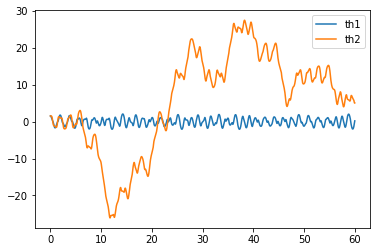

In [6]:
plt.plot(t_values, th1, label="th1")
plt.plot(t_values, th2, label="th2")
plt.legend()
plt.show()


The mechanical energy of the double pendulum system is given the the equation:

$$E = m\ell^2 \bigl[ \omega_1^2 + \tfrac12 \omega_2^2 + \omega_1\omega_2 \cos(\theta_1-\theta_2) \bigr] - mg\ell(2\cos\theta_1 + \cos\theta_2)\,.$$

The next step is to calcuate the total energy that this system has. We expect this value to be 0 as time goes on for the simple fact that energy should be conserved no matter what.

(-1e-05, 1e-05)

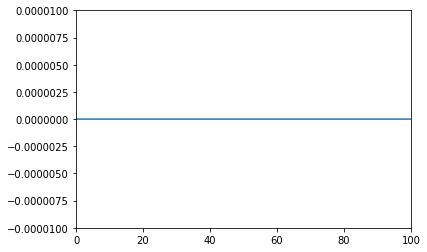

In [8]:
m = 1
E = m*l**2*(w1**2 + w2**2/2 + w1*w2*np.cos(th1-th2)) - m*g*l*(2*np.cos(th1) + np.cos(th2))

plt.plot(E)
plt.xlim(0, 100)
plt.ylim(-0.00001, 0.00001)


# To Summarize:

In this project, the differential equations of motion for a double pendulum were used to calculate and model its movement through time using 